### Importación de datos



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tiendas  = [tienda, tienda2, tienda3, tienda4]
tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación



In [3]:
tiendas  = [tienda, tienda2, tienda3, tienda4]
for i, tienda in enumerate(tiendas, start=1):
  ingreso = tienda['Precio'].sum()
  print(f"Ingreso de tienda {i}: {ingreso}")

Ingreso de tienda 1: 1150880400.0
Ingreso de tienda 2: 1116343500.0
Ingreso de tienda 3: 1098019600.0
Ingreso de tienda 4: 1038375700.0


La Tienda 4 registra el menor ingreso total (1,038,375,700), lo que indica un menor rendimiento financiero en comparación con las demás.

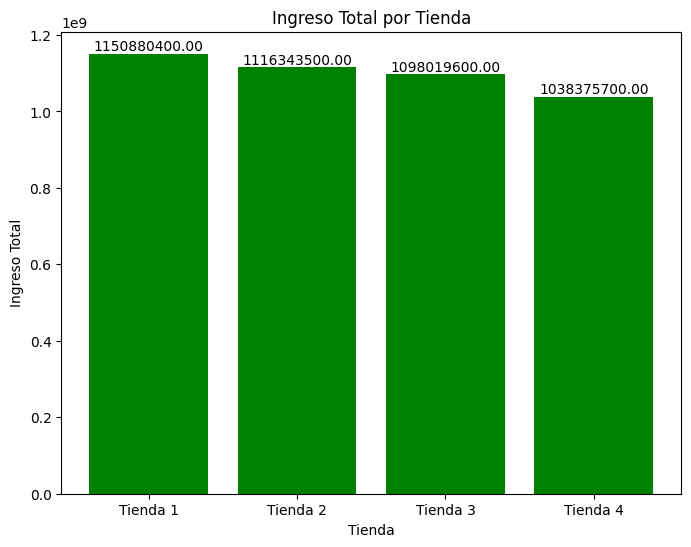

In [8]:
ingresos = [tienda['Precio'].sum() for tienda in tiendas]
plt.figure(figsize=(8, 6))
barras = plt.bar(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], ingresos, color='green')

plt.title('Ingreso Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso Total')

for barra in barras:
    plt.text(barra.get_x() + barra.get_width()/2,
             barra.get_height(),
             f'{barra.get_height():.2f}',
             ha='center',
             va='bottom')

plt.show()

Los gráficos de barras permitieron visualizar de forma clara qué tiendas contribuyen más a los ingresos totales de la cadena y cuáles tienen un desempeño inferior en este aspecto.

# 2. Ventas por categoría



In [15]:
for i, tienda in enumerate(tiendas, start=1):
    ventas_categoria = tienda['Categoría del Producto'].value_counts()
    print(f"\nVentas por categoría - Tienda {i}")
    print(ventas_categoria)


Ventas por categoría - Tienda 1
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Ventas por categoría - Tienda 2
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Ventas por categoría - Tienda 3
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64

Ventas po

En todas las tiendas, las categorías Muebles y Electrónicos son las más vendidas, lo que demuestra una tendencia clara en la preferencia de los clientes.

Sin embargo, la Tienda 4 presenta menores ventas en categorías clave como Electrodomésticos e Instrumentos musicales, mientras que categorías con menor demanda tienen un peso relativamente mayor. Esto sugiere una estructura de ventas menos eficiente en comparación con las otras tiendas.

In [18]:
def graficar_categorias(tienda, nombre_tienda):

  categorias = tienda.groupby('Categoría del Producto').size()
  plt.figure(figsize=(8, 6))
  plt.pie(
        categorias,
        labels=categorias.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors
    )
  plt.title(f'Distribución de Categorías - {nombre_tienda}')
  plt.axis('equal')
  plt.show()

Se observó que ciertas categorías concentran la mayor parte de las ventas, mientras que otras tienen un desempeño limitado. Además, algunas tiendas presentan una menor diversificación en categorías exitosas, lo que puede afectar su competitividad frente a las demás.

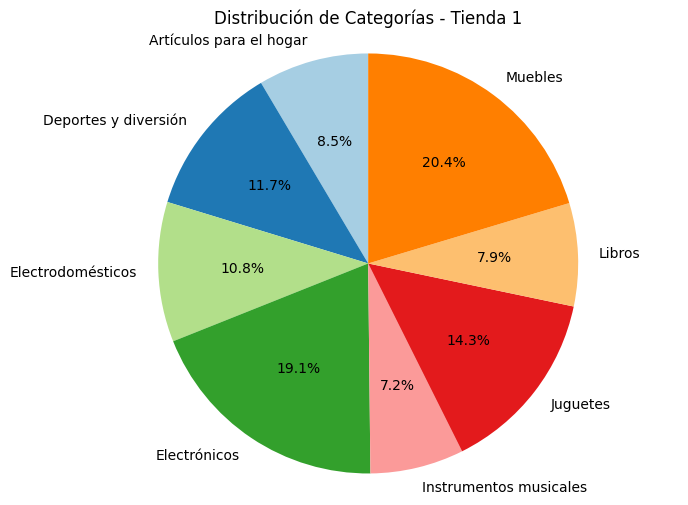

In [19]:
graficar_categorias(tienda, "Tienda 1")

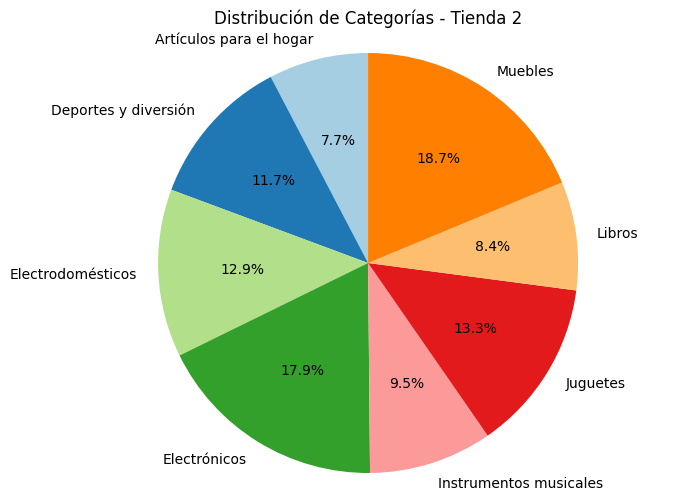

In [20]:
graficar_categorias(tienda2, "Tienda 2")

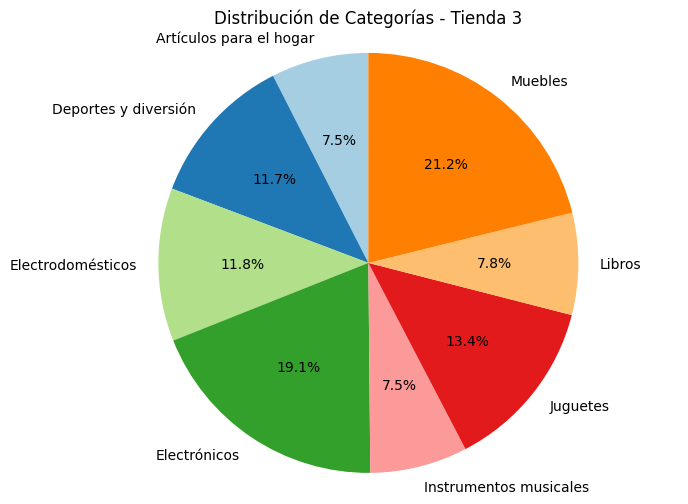

In [21]:
graficar_categorias(tienda3, "Tienda 3")

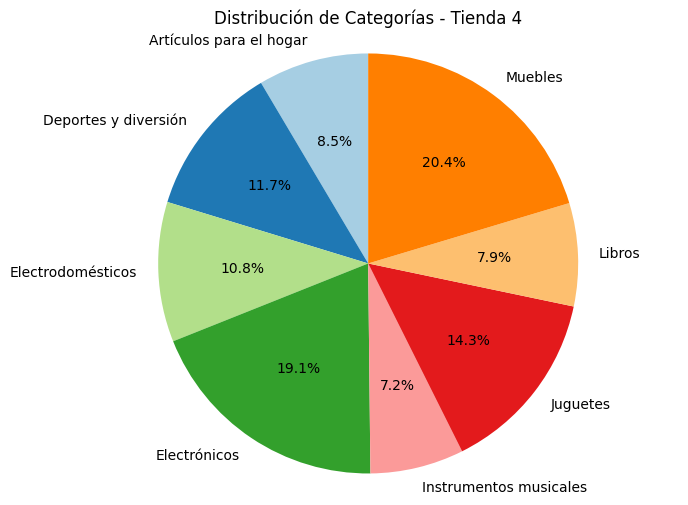

In [22]:
graficar_categorias(tienda4, "Tienda 4")

# 3. Calificación promedio de la tienda


In [27]:
valoraciones_medias = []

for i, tienda in enumerate(tiendas, start=1):
    promedio = tienda['Calificación'].mean()
    valoraciones_medias.append(promedio)
    print(f"Valoración media de la Tienda {i}: {promedio:.2f}")

Valoración media de la Tienda 1: 3.98
Valoración media de la Tienda 2: 4.04
Valoración media de la Tienda 3: 4.05
Valoración media de la Tienda 4: 4.00


Las calificaciones promedio de los clientes son relativamente similares entre las tiendas, oscilando entre 3.98 y 4.05.

Aunque la Tienda 4 no tiene la peor calificación, tampoco destaca positivamente frente a la Tienda 2 y la Tienda 3, que presentan los mejores niveles de satisfacción del cliente.

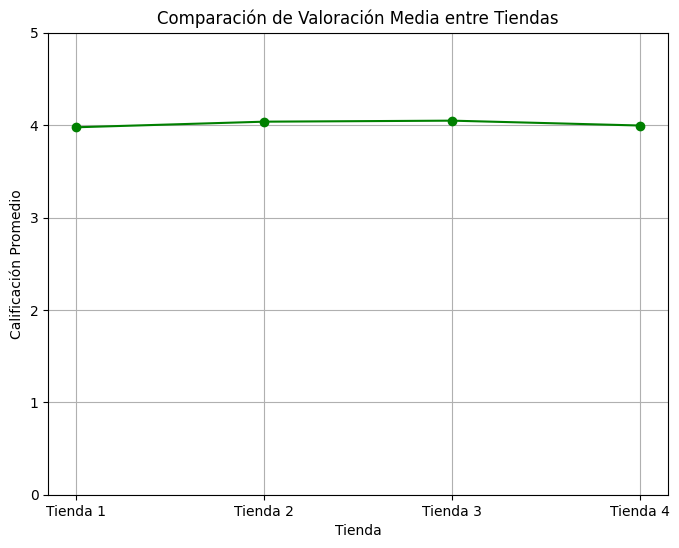

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
         valoraciones_medias,
         marker='o',
         linestyle='-',
         color='green')

plt.title('Comparación de Valoración Media entre Tiendas')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.ylim(0, 5)
plt.grid(True)
plt.show()

A partir del gráfico de líneas, se evidenció que no todas las tiendas mantienen el mismo nivel de valoración. Las tiendas con calificaciones más bajas podrían estar enfrentando problemas relacionados con la calidad del servicio, los productos o la logística.

# 4. Productos más y menos vendidos

In [30]:
for i, tienda in enumerate(tiendas, start=1):
    conteo_productos = tienda['Producto'].value_counts()

    producto_mas_vendido = conteo_productos.idxmax()
    producto_menos_vendido = conteo_productos.idxmin()

    print(f"\nTienda {i}")
    print(f"Producto más vendido: {producto_mas_vendido} ({conteo_productos.max()} ventas)")
    print(f"Producto menos vendido: {producto_menos_vendido} ({conteo_productos.min()} ventas)")



Tienda 1
Producto más vendido: Microondas (60 ventas)
Producto menos vendido: Auriculares con micrófono (33 ventas)

Tienda 2
Producto más vendido: Iniciando en programación (65 ventas)
Producto menos vendido: Juego de mesa (32 ventas)

Tienda 3
Producto más vendido: Kit de bancas (57 ventas)
Producto menos vendido: Bloques de construcción (35 ventas)

Tienda 4
Producto más vendido: Cama box (62 ventas)
Producto menos vendido: Guitarra eléctrica (33 ventas)


El análisis de los productos revela que cada tienda cuenta con artículos destacados en ventas. Sin embargo, la Tienda 4 presenta productos menos vendidos con volúmenes relativamente bajos, como la Guitarra eléctrica (33 ventas), lo que indica una rotación de productos menos eficiente.

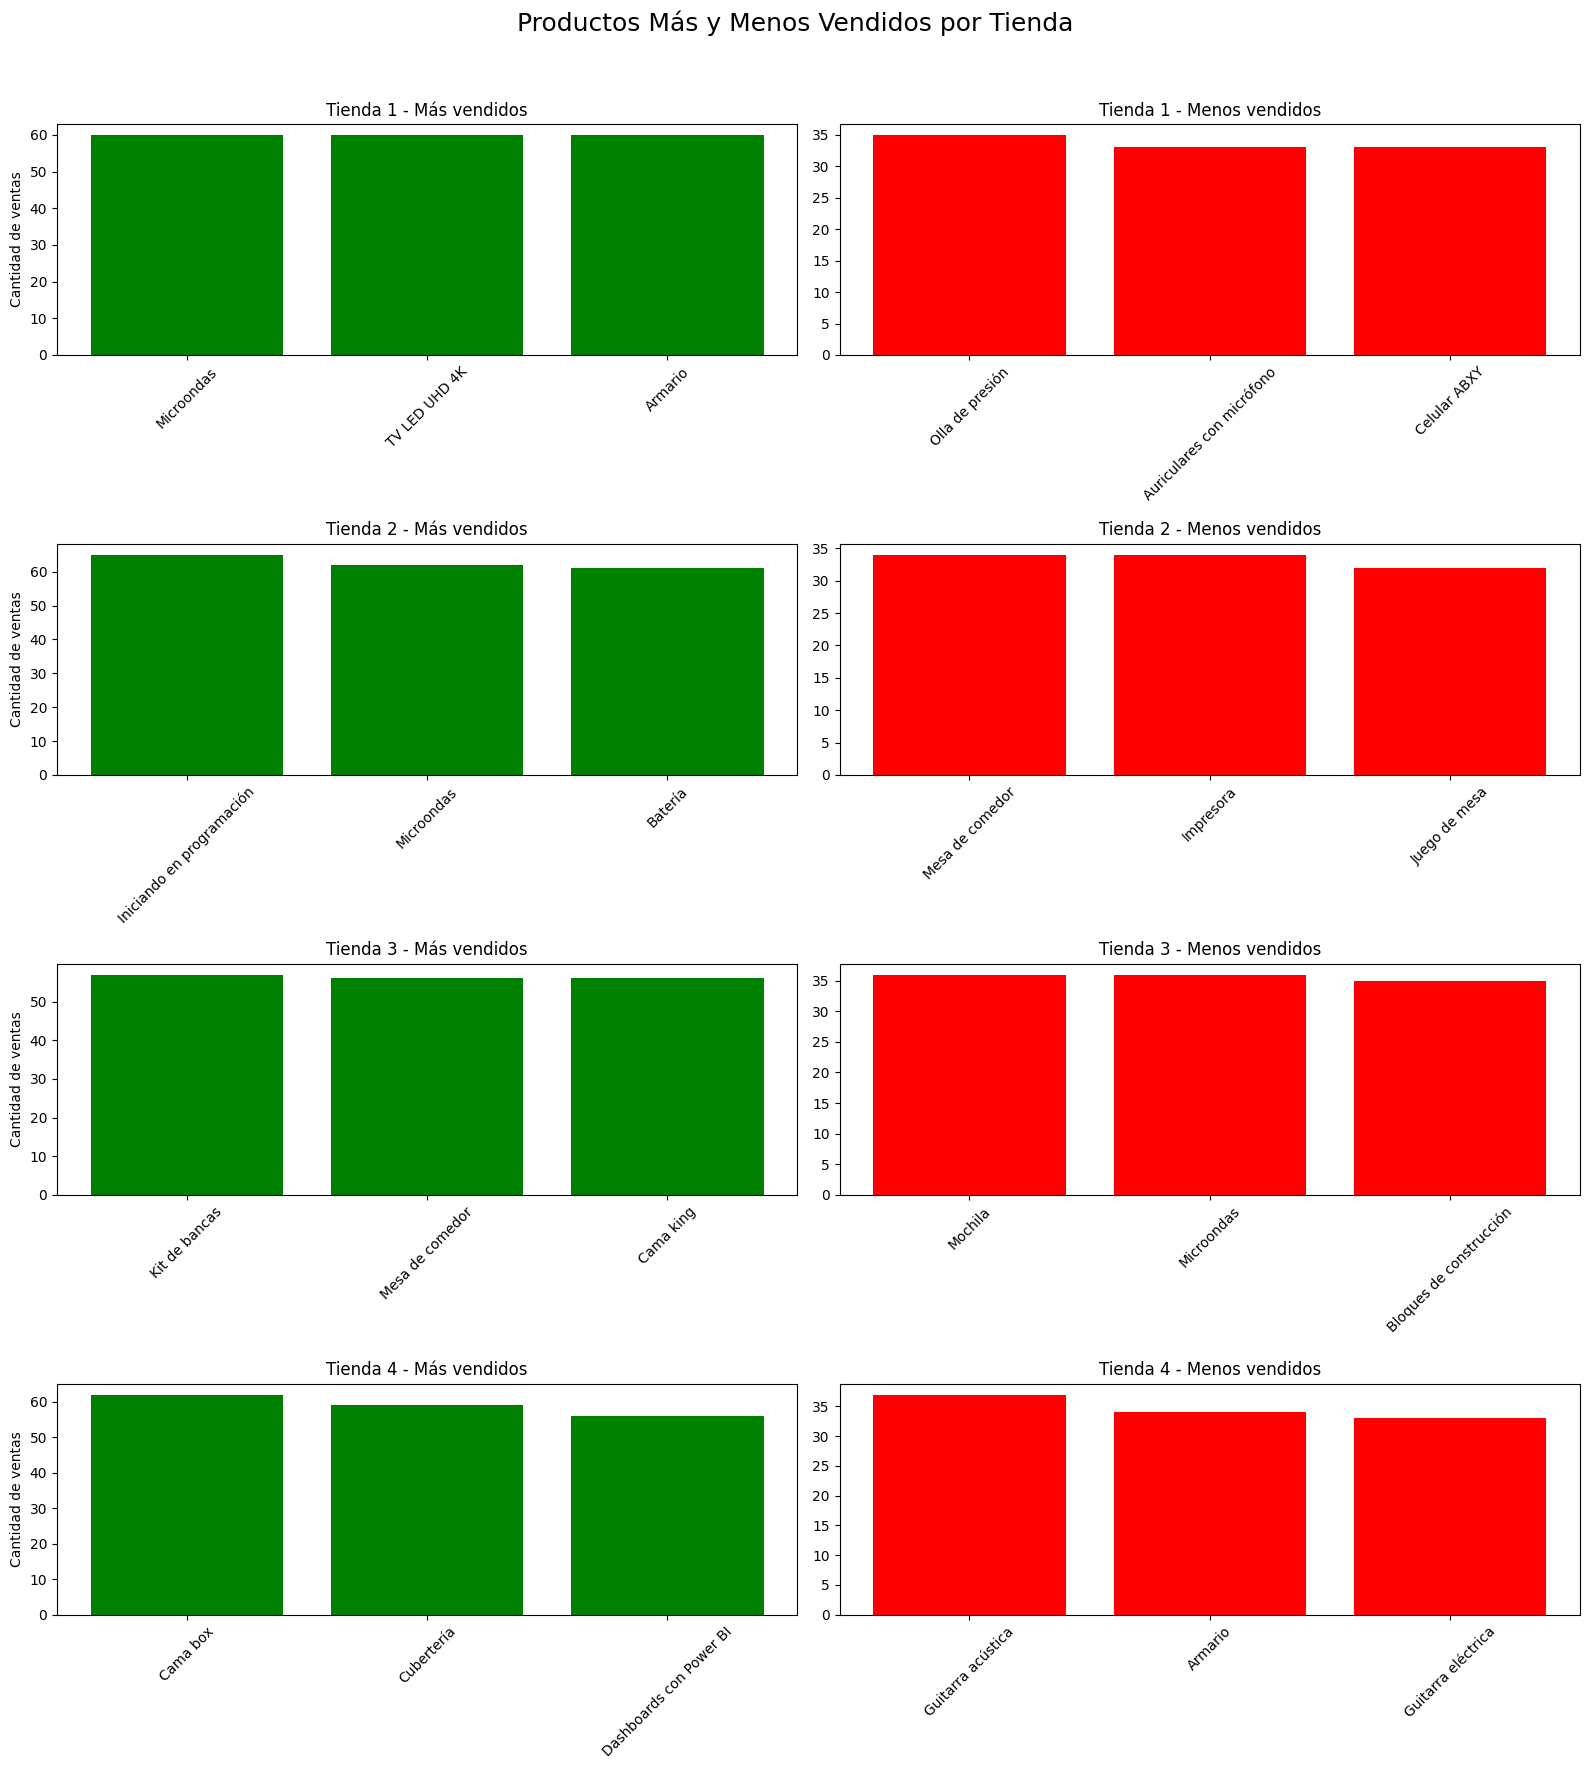

In [33]:
fig, axes = plt.subplots(4, 2, figsize=(16, 18))
fig.suptitle('Productos Más y Menos Vendidos por Tienda', fontsize=18)

for i, tienda in enumerate(tiendas):
    conteo = tienda['Producto'].value_counts()

    top_productos = conteo.head(3)
    bottom_productos = conteo.tail(3)

    # Más vendidos
    axes[i, 0].bar(top_productos.index, top_productos.values, color='green')
    axes[i, 0].set_title(f'Tienda {i+1} - Más vendidos')
    axes[i, 0].set_ylabel('Cantidad de ventas')
    axes[i, 0].tick_params(axis='x', rotation=45)

    # Menos vendidos
    axes[i, 1].bar(bottom_productos.index, bottom_productos.values, color='red')
    axes[i, 1].set_title(f'Tienda {i+1} - Menos vendidos')
    axes[i, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Los gráficos generales por tienda facilitaron la comparación visual de estos resultados.

# 5. Envío promedio por tienda

In [35]:
envio_promedio = []

for i, tienda in enumerate(tiendas, start=1):
    promedio_envio = tienda['Costo de envío'].mean()
    envio_promedio.append(promedio_envio)
    print(f"Costo promedio de envío - Tienda {i}: {promedio_envio:.2f}")


Costo promedio de envío - Tienda 1: 26018.61
Costo promedio de envío - Tienda 2: 25216.24
Costo promedio de envío - Tienda 3: 24805.68
Costo promedio de envío - Tienda 4: 23459.46


El costo promedio de envío disminuye progresivamente desde la Tienda 1 hasta la Tienda 4:

Aunque la Tienda 4 presenta el menor costo de envío, este factor no compensa su menor nivel de ingresos y su desempeño general en ventas.

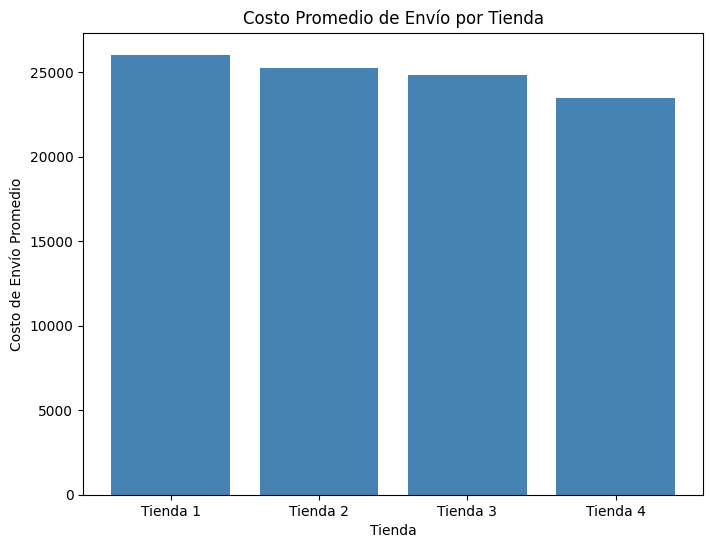

In [36]:
plt.figure(figsize=(8, 6))
plt.bar(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
        envio_promedio,
        color='steelblue')

plt.title('Costo Promedio de Envío por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio')
plt.show()


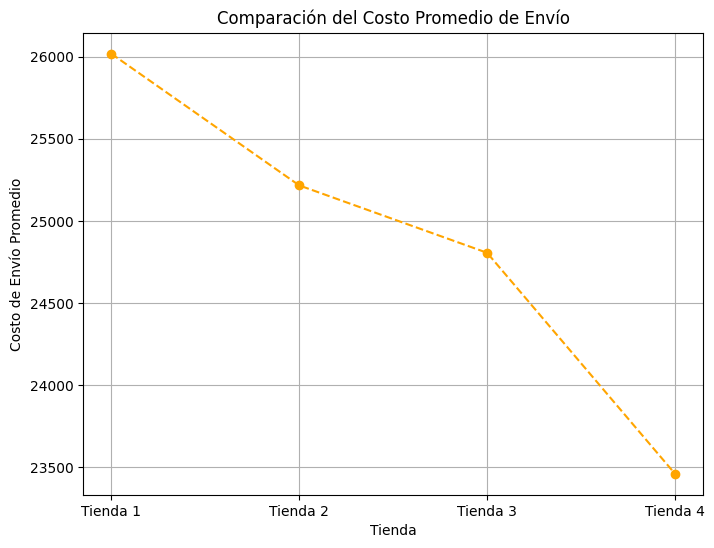

In [37]:
plt.figure(figsize=(8, 6))
plt.plot(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
         envio_promedio,
         marker='o',
         linestyle='--',
         color='orange')

plt.title('Comparación del Costo Promedio de Envío')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio')
plt.grid(True)
plt.show()


El análisis mostró que algunas tiendas presentan costos de envío más elevados que el promedio, lo cual puede afectar negativamente la decisión de compra y reducir la competitividad frente a otras tiendas con costos logísticos más bajos

# Conclusión y recomendación final

Con base en el análisis de todos los indicadores evaluados —ingresos, ventas por categoría, satisfacción del cliente, productos más y menos vendidos y costos de envío— se concluye que la Tienda 4 es la opción más adecuada para ser vendida.

A pesar de contar con el menor costo promedio de envío, la Tienda 4 presenta:

* El ingreso total más bajo de la cadena.
* Un desempeño menos competitivo en categorías clave.
* Niveles de satisfacción que no destacan frente a otras tiendas.
* Productos con menor rotación en ventas.

En contraste, las otras tiendas muestran un mejor equilibrio entre ingresos, satisfacción del cliente y eficiencia operativa.


**Recomendación:**
Se recomienda que el Sr. Juan venda la Tienda 4, ya que es la que muestra el desempeño global más bajo en comparación con las demás. Esta decisión permitiría enfocar recursos en las tiendas con mejores resultados financieros y mayor aceptación por parte de los clientes.